<a href="https://colab.research.google.com/github/lcbjrrr/ML315/blob/main/ML315_1_DataAna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descriptive Analysis

## Data Load

Data analysis with Python is a powerful way to extract insights from data. Libraries like Pandas and NumPy provide efficient tools for data manipulation, cleaning, and transformation. Matplotlib and Seaborn enable compelling visualizations to uncover patterns and trends. Python's versatility and extensive ecosystem make it a popular choice for data scientists and analysts across various domains

In [35]:
import pandas as pd
grades = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/ML315/refs/heads/main/datasets/grades_final.csv')
grades.head(3)

,Course,Student,AP1,AP2,AP3,Grade,Score
0,ADM,Finn,90,90,90,91,A
1,ADM,Jack,60,40,100,61,D
2,LAW,Leo,40,30,40,36,E


In Python with pandas, the head() and tail() methods are used to view the beginning and end of a DataFrame.

In [36]:
grades.tail(2)

,Course,Student,AP1,AP2,AP3,Grade,Score
10,ADM,Quinn,80,70,60,72,C
11,ADM,Wren,45,40,40,42,E


In pandas, you can select a specific column of a DataFrame using square brackets with the column name, like df['column_name']

In [37]:
grades['Grade']

,Grade
0,91
1,61
2,36
3,86
4,81
5,54
6,72
7,89
8,78
9,97


In [38]:
grades['avg'] = (grades['AP1'] + grades['AP2'] + grades['AP3'])/3
grades

,Course,Student,AP1,AP2,AP3,Grade,Score,avg
0,ADM,Finn,90,90,90,91,A,90.000000
1,ADM,Jack,60,40,100,61,D,66.666667
2,LAW,Leo,40,30,40,36,E,36.666667
3,LAW,Milo,80,100,70,86,B,83.333333
4,ECO,Seth,75,80,95,81,B,83.333333
5,LAW,Zane,60,45,60,54,E,55.000000
6,ADM,Claire,80,60,80,72,C,73.333333
7,LAW,June,75,100,95,89,B,90.000000
8,ECO,Paige,60,100,70,78,C,76.666667
9,LAW,Rose,100,95,95,97,A,96.666667


## Data Filtering

You can filter rows in a pandas DataFrame by using boolean indexing, which involves creating a boolean Series based on a condition and using it to select rows.

In [39]:
grades[ grades['Score']=='A' ]

,Course,Student,AP1,AP2,AP3,Grade,Score,avg
0,ADM,Finn,90,90,90,91,A,90.000000
9,LAW,Rose,100,95,95,97,A,96.666667


In [40]:
grades[  grades["Grade"]>80 ]

,Course,Student,AP1,AP2,AP3,Grade,Score,avg
0,ADM,Finn,90,90,90,91,A,90.000000
3,LAW,Milo,80,100,70,86,B,83.333333
4,ECO,Seth,75,80,95,81,B,83.333333
7,LAW,June,75,100,95,89,B,90.000000
9,LAW,Rose,100,95,95,97,A,96.666667


## Aggregation / Summarization

The groupby() method, often used with aggregation functions like mean() or sum(), allows you to group rows based on one or more columns and perform calculations on those groups.

In [41]:
average_grade_course = grades.groupby('Course')['Grade'].mean()
average_grade_course

,Grade
Course,
ADM,67.6
ECO,79.5
LAW,72.4


## Comparison (Bar charts)

Bar charts are a common and effective way to visually compare different categories or groups. The length or height of each bar represents the value of a specific category, making it easy to see relative differences and patterns at a glance. They are particularly useful for comparing quantities, frequencies, or other numerical data across discrete items.

<Axes: xlabel='Course'>

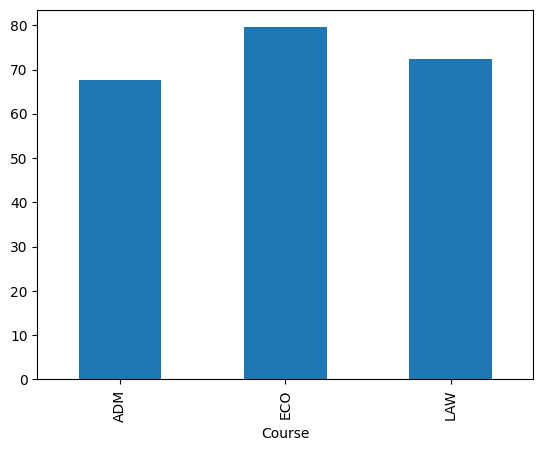

In [42]:
average_grade_course.plot(kind='bar')

In [43]:
agg = grades.groupby(['Course','Score'])['Grade'].mean()
print(agg)
agg = agg.reset_index()
agg

Course  Score
ADM     A        91.0
        C        72.0
        D        61.0
        E        42.0
ECO     B        81.0
        C        78.0
LAW     A        97.0
        B        87.5
        E        45.0
Name: Grade, dtype: float64


,Course,Score,Grade
0,ADM,A,91.0
1,ADM,C,72.0
2,ADM,D,61.0
3,ADM,E,42.0
4,ECO,B,81.0
5,ECO,C,78.0
6,LAW,A,97.0
7,LAW,B,87.5
8,LAW,E,45.0


<Axes: xlabel='Course', ylabel='Grade'>

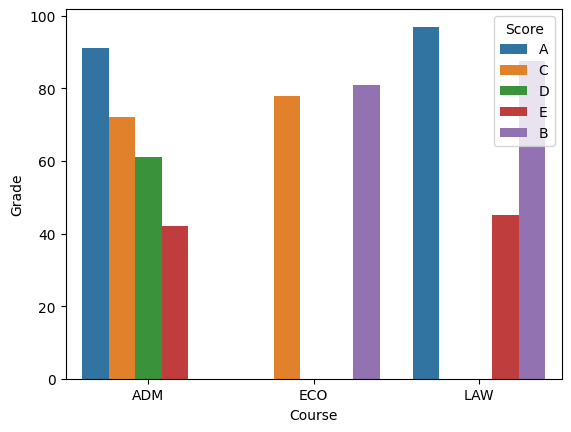

In [44]:
import seaborn as sns
sns.barplot(x=agg['Course'], y=agg['Grade'], hue=agg['Score'])

## Proportions (Pie chart)

Pie charts are useful for visualizing proportions of a whole. Each slice of the pie represents a category, and the size of the slice corresponds to its percentage of the total. This makes it easy to see the relative contribution of each category to the overall dataset. However, they are less effective when comparing many categories or when the proportions are very similar.

Course
ADM    5
ECO    2
LAW    5
Name: Student, dtype: int64


<Axes: ylabel='Student'>

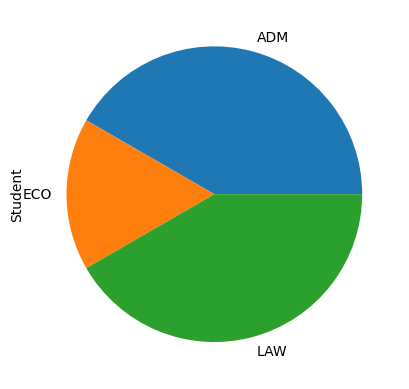

In [45]:
student_per_course = grades.groupby('Course')['Student'].count()
print(student_per_course)
student_per_course.plot(kind='pie')

## Trend Analysis (Line chart)

Line charts are particularly effective for visualizing trends over time or ordered categories. By connecting data points with lines, they clearly show patterns, fluctuations, and overall direction, making it easy to identify increases, decreases, or cycles in the data. They are commonly used for time series data, showing how a variable changes continuously over a period.

In [46]:
covid = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/ML315/refs/heads/main/datasets/covid19.csv')
covid.head(3)

,date,Brazil,India,US
0,1/23/20,0,0,0
1,1/24/20,0,0,1
2,1/25/20,0,0,0


In [47]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    586 non-null    object
 1   Brazil  586 non-null    int64 
 2   India   586 non-null    int64 
 3   US      586 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 18.4+ KB


In [48]:
covid.index = pd.to_datetime(covid['date'])
covid.head(3)

/tmp/ipython-input-3510833704.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  covid.index = pd.to_datetime(covid['date'])


,date,Brazil,India,US
date,,,,
2020-01-23,1/23/20,0,0,0
2020-01-24,1/24/20,0,0,1
2020-01-25,1/25/20,0,0,0


In [49]:
covid=covid.drop('date', axis=1)
covid.head(3)

,Brazil,India,US
date,,,
2020-01-23,0,0,0
2020-01-24,0,0,1
2020-01-25,0,0,0


<Figure size 1500x1200 with 0 Axes>

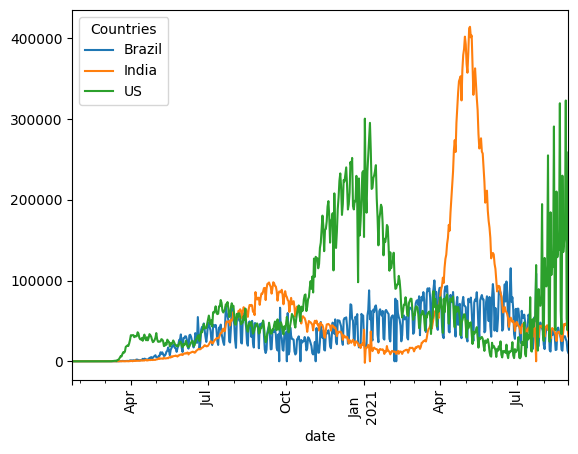

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
covid.plot()
plt.xticks(rotation=90)
plt.legend(title='Countries')
plt.show()

# Statistical Analysis

## Frequency and Histograms

### Categorical Frequency

Score
E    3
C    3
B    3
A    2
D    1
Name: count, dtype: int64


<Axes: xlabel='Score'>

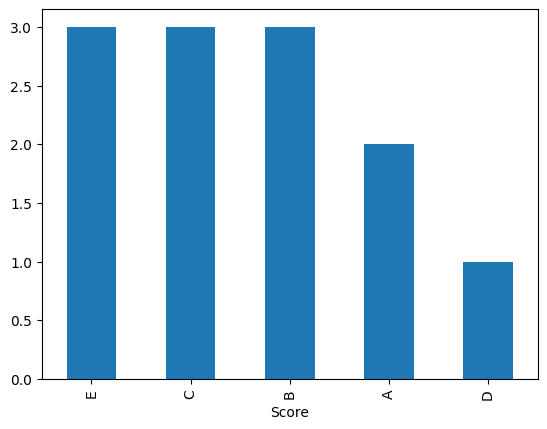

In [51]:
cat_freq = grades['Score'].value_counts()
print(cat_freq)
cat_freq.plot(kind='bar')

### Numerical Frenquency

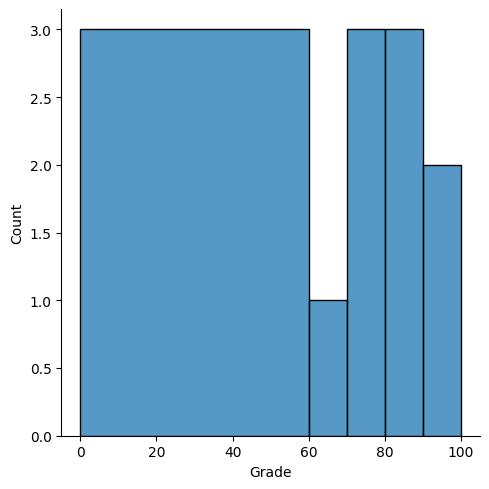

In [52]:
import seaborn as sns
sns.displot(grades['Grade'],bins=[0,60,70,80,90,100])


## Quartiles and Boxplot

Quartiles and boxplots are useful for summarizing the distribution of numerical data and identifying potential outliers. Quartiles divide the data into four equal parts, indicating the spread and central tendency. A boxplot visually represents the quartiles, median, and potential outliers, providing a clear picture of the data's distribution and skewness.

In [53]:
grades['Grade'].describe()

,Grade
count,12.000000
mean,71.583333
std,19.602682
min,36.000000
25%,59.250000
50%,75.000000
75%,86.750000
max,97.000000


<Axes: ylabel='Grade'>

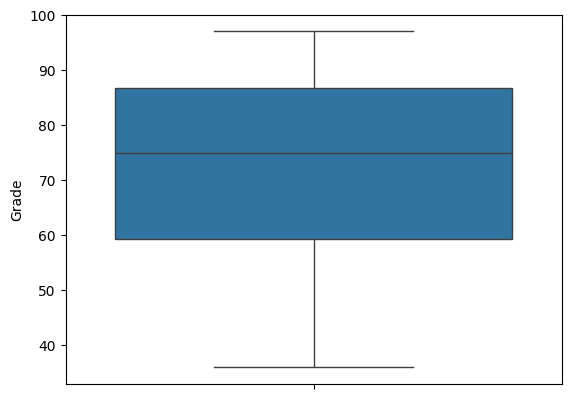

In [54]:
sns.boxplot(grades['Grade'])

<Axes: xlabel='Course', ylabel='Grade'>

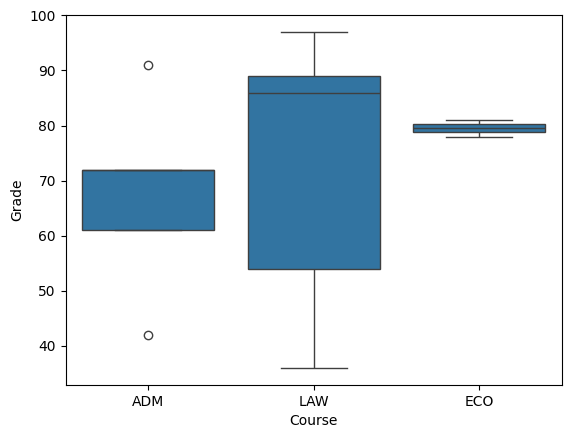

In [55]:
sns.boxplot(y=grades['Grade'],x=grades['Course'])